In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
def plot_pca(file_path):
    # 地域情報のファイルを読み込む
    # ファイル名は適宜変更してください
    df_region = pd.read_csv('~/research_icloud/v54.1.p1_1240K_public.ind', sep='\s+', header=None)

    # 列名を設定
    df_region.columns = ['Sample', 'Sex', 'Region']


    # データをデータフレームに読み込む
    # ファイル名は適宜変更してください
    df = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1)

    # 列名を設定
    df.columns = ['Sample', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'Group']

    df['Sample'] = df['Sample'].str.replace('0:', '')

    # 元のデータフレームと地域情報のデータフレームをマージ
    df_merged = pd.merge(df, df_region, on='Sample', how='left')

    # キーワードと色のマッピングを定義
    keywords_colors = {'japan':'red', 'JPT': 'red','CHB': 'blue', 'china': 'blue', 'korea': 'green', 'jomon': 'brown', 'yayoi': 'y', 'kofun': 'purple', 'nagabaka': 'pink'}

    # 特殊なサンプル名と色のマッピングを定義
    special_samples_colors = {'T5': 'orange', 'I4': 'c', 'F23': 'k', 'FM020': 'm'}


    # 新しい'Color'カラムを初期化
    df_merged['Color'] = 'grey'  # どのキーワードもマッチしない場合のデフォルトの色
    df_merged['Label'] = 'others'

    # 各キーワードについて、'Region'カラムがそのキーワードを含むかどうかを調べ、対応する色とラベルを設定
    for keyword, color in keywords_colors.items():
        is_keyword = df_merged['Region'].str.contains(keyword, case=False, na=False)
        df_merged.loc[is_keyword, 'Color'] = color
        df_merged.loc[is_keyword, 'Label'] = keyword

    for sample, color in special_samples_colors.items():
        is_sample = df_merged['Sample'] == sample
        df_merged.loc[is_sample, 'Color'] = color
        df_merged.loc[is_sample, 'Label'] = sample

    # 'jomon'がマッチしたが'japan'もマッチした場合は色を'brown'に設定
    is_jomon_and_japan = df_merged['Region'].str.contains('jomon', case=False, na=False) & df_merged['Region'].str.contains('japan', case=False, na=False)
    df_merged.loc[is_jomon_and_japan, 'Color'] = 'brown'
    df_merged.loc[is_jomon_and_japan, 'Label'] = 'jomon'

    # プロット作成
    plt.figure(figsize=(10, 10))

    for label in df_merged['Label'].unique():
        print(label)
        is_label = df_merged['Label'] == label
        plt.scatter(df_merged[is_label]['PC1'], df_merged[is_label]['PC2'], c=df_merged[is_label]['Color'], label=label, s=15)

        # 'jomon'とマッチしたサンプル名を表示
        if label == 'jomon' or label == 'pink':
            for i, txt in enumerate(df_merged[is_label]['Sample']):
                plt.annotate(txt, (df_merged[is_label]['PC1'].iloc[i], df_merged[is_label]['PC2'].iloc[i]))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA')
    plt.legend(title='Populations', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

others
CHB
china
F23
FM020
I4
japan
jomon
kofun
yayoi
nagabaka
JPT
korea
T5


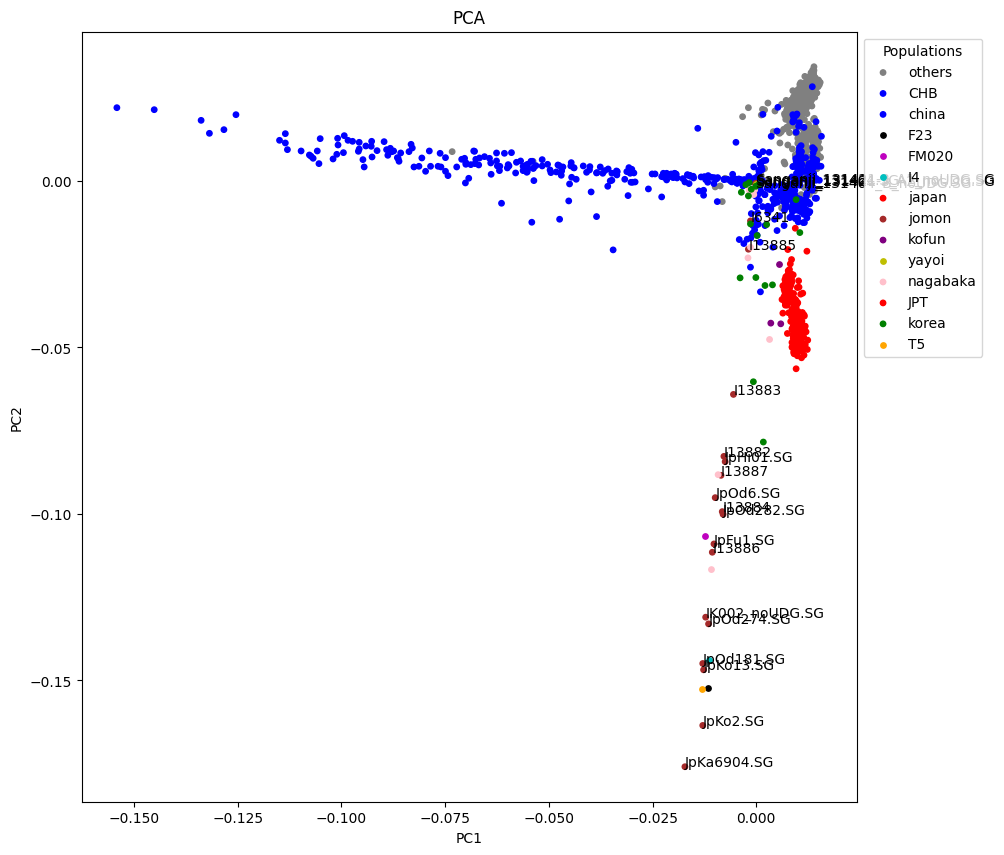

In [103]:
plot_pca('~/research_icloud/pca/J4_aadr_east_asian.evec.txt')

china
F23
FM020
others
I4
japan
jomon
kofun
yayoi
nagabaka
korea
T5


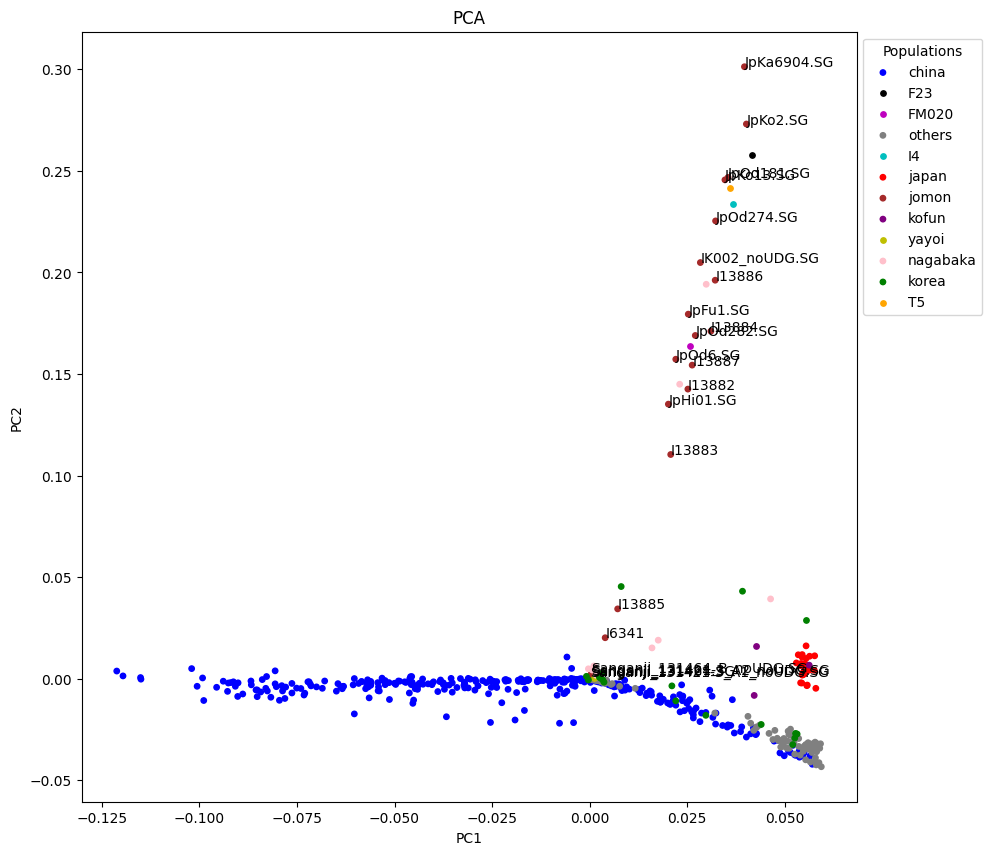

In [104]:
plot_pca('~/research_icloud/pca/J4_aadr_east_ancient.evec.txt')


others
CHB
F23
FM020
I4
japan
jomon
kofun
yayoi
nagabaka
JPT
T5


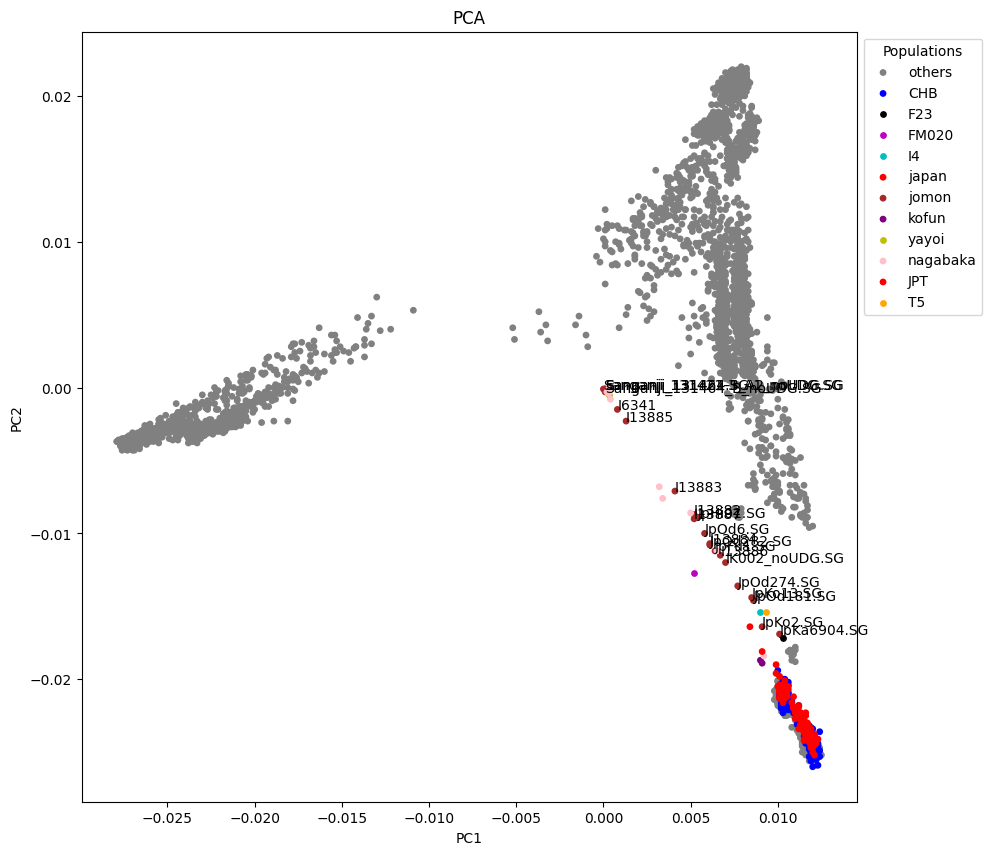

In [105]:
plot_pca('~/research_icloud/pca/J4_aadr_genomes_1000.evec.txt')